In [1]:
import pandas as pd
import numpy as np
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline

## visualize

In [2]:
# load data set
columns = ['DistY_EM_Object_var','u_NofCluster','TunnelProbability','static_left_num','static_right_num','TargetRate','TargetRateState']
data = pd.read_csv('../public-dataset/tunnelprobability.csv',skiprows=8,names=columns)
data.head(10)

,DistY_EM_Object_var,u_NofCluster,TunnelProbability,static_left_num,static_right_num,TargetRate,TargetRateState
0,51.713934,241,0.376245,129,100,256.701721,235.537201
1,51.713934,241,0.376245,129,100,256.701721,235.537201
2,51.713934,241,0.376245,129,100,256.701721,235.537201
3,51.713934,241,0.376245,129,100,256.701721,235.537201
4,51.713934,241,0.376245,129,100,256.701721,235.537201
5,51.713934,241,0.376245,129,100,256.701721,235.537201
6,51.713934,241,0.376245,129,100,256.701721,235.537201
7,51.713934,241,0.376245,129,100,256.701721,235.537201
8,51.713934,269,0.376245,152,100,256.701721,235.537201
9,45.656515,269,0.368466,152,100,256.823486,235.700195


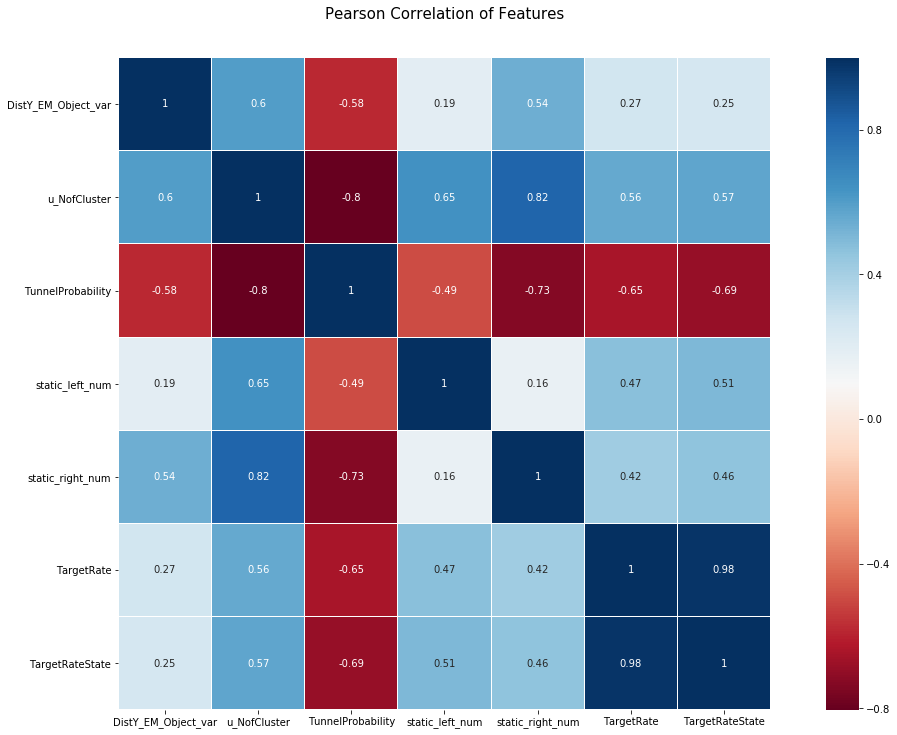

In [3]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

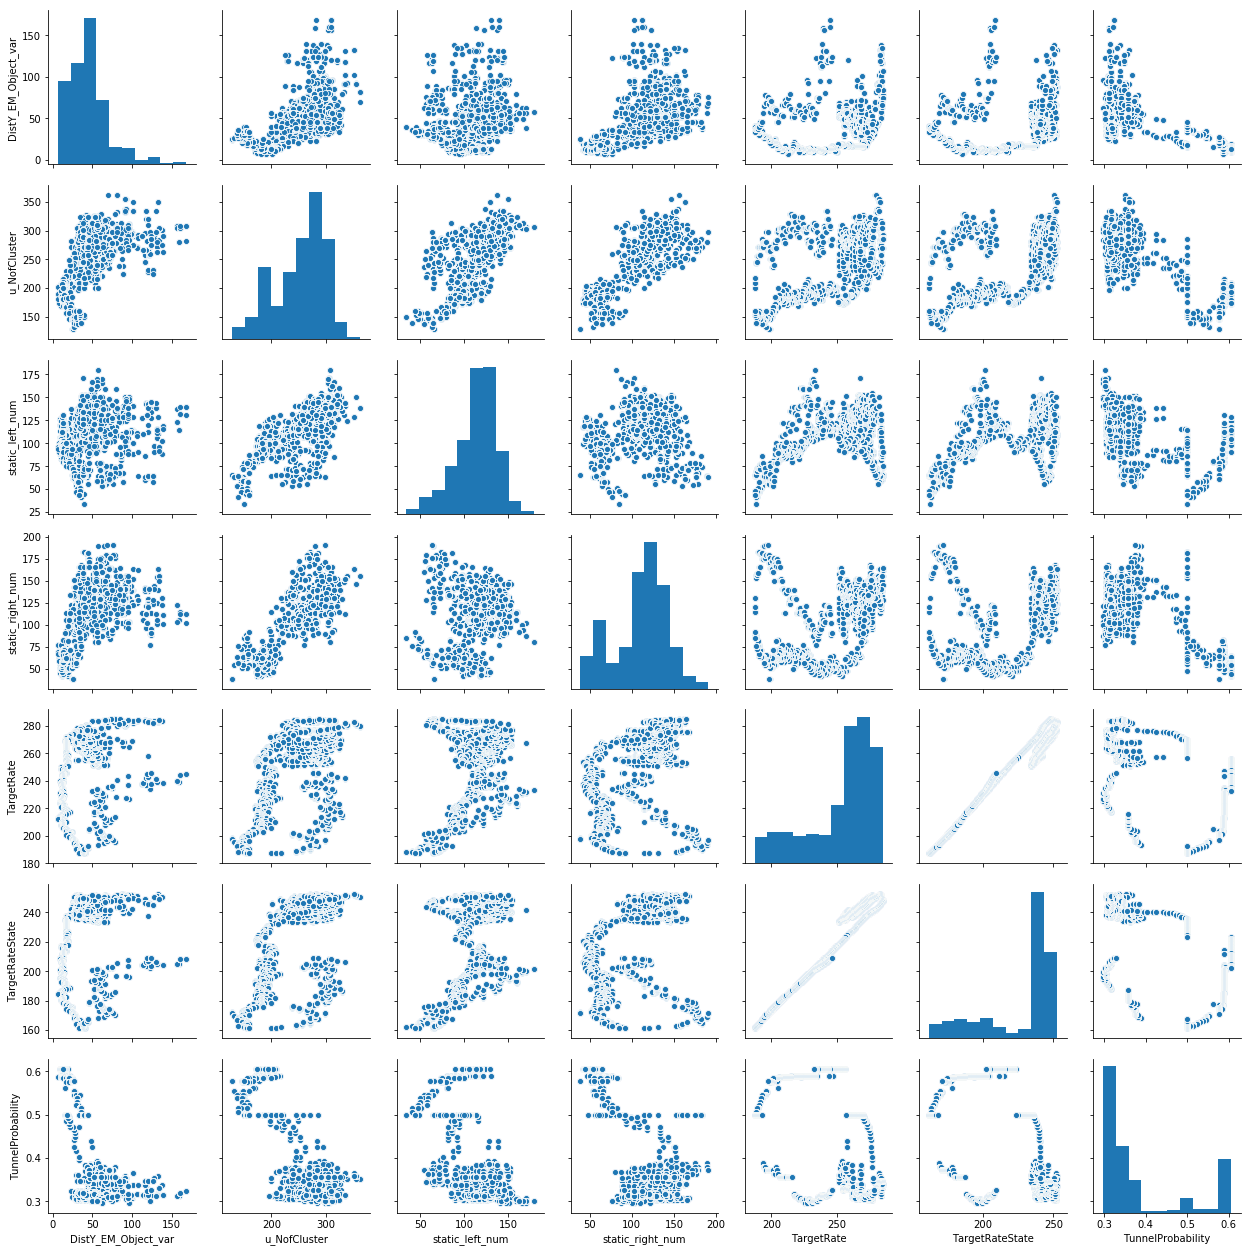

In [4]:
sns.pairplot(data=data[['DistY_EM_Object_var','u_NofCluster','static_left_num','static_right_num','TargetRate','TargetRateState','TunnelProbability']])

## processing

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
y_data = data['TunnelProbability'].ravel()
y_data

array([ 0.37624493,  0.37624493,  0.37624493, ...,  0.32715571,
        0.32715571,  0.32715571])

In [9]:
x_data = data.drop(['TunnelProbability'],axis=1)
x_data.head()

,DistY_EM_Object_var,u_NofCluster,static_left_num,static_right_num,TargetRate,TargetRateState
0,51.713934,241,129,100,256.701721,235.537201
1,51.713934,241,129,100,256.701721,235.537201
2,51.713934,241,129,100,256.701721,235.537201
3,51.713934,241,129,100,256.701721,235.537201
4,51.713934,241,129,100,256.701721,235.537201


In [10]:
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3,shuffle=True,random_state=1)

In [11]:
X_train.head()

,DistY_EM_Object_var,u_NofCluster,static_left_num,static_right_num,TargetRate,TargetRateState
6808,13.150619,172,85,61,208.928970,181.278427
4489,35.866569,289,132,127,276.292633,248.932739
6547,15.979968,187,89,65,217.988800,189.614792
3402,43.163972,255,112,114,268.703552,242.311798
6563,17.745687,175,93,52,217.200562,188.784714


In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_pred = lr.predict(X_test)

In [14]:
from sklearn.metrics import precision_score,mean_squared_error


In [20]:
mean_squared_error(y_test,y_pred)

0.0023873623233320192

In [21]:
y_true = y_test.reshape(-1,)
y_true.shape

(2466,)

In [22]:
y_pred = y_pred.reshape(-1,)

In [23]:
mat = np.array([y_true,y_pred]).T
mat.shape

(2466, 2)

In [24]:
res = pd.DataFrame(data=mat,columns=['true','pred'])

In [25]:
res

,true,pred
0,0.369143,0.369445
1,0.587212,0.554405
2,0.311795,0.288272
3,0.320790,0.375943
4,0.339482,0.330610
5,0.371922,0.396597
6,0.605240,0.532888
7,0.304909,0.286590
8,0.327156,0.351477
9,0.330594,0.350921


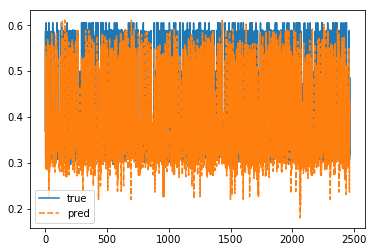

In [30]:
sns.lineplot(data=res)

In [28]:
lr.coef_

array([ -9.23340167e-04,  -8.02975253e-04,   3.59891666e-05,
        -4.39675145e-04,   2.87127664e-03,  -4.26933931e-03])

In [29]:
lr.intercept_

0.91635567532428341